In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1= pd.read_csv('Model.csv')
df= df1.copy()

In [3]:
df.columns

Index(['Unnamed: 0', 'Managed_By', 'Fulfill_Via', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Brand', 'Dosage_Form',
       'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'First_Line_Designation', 'Weight_(Kilograms)',
       'Freight_Cost_USD', 'Freight_Cost_USD_Clean', 'Weight_Kilograms_Clean',
       'Manufacturing_company', 'country_encoded', 'shipment_mode_encoded',
       'manufacturing_site_encoded'],
      dtype='object')

In [4]:
predictors=df[['Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Weight_Kilograms_Clean',
       'country_encoded', 'shipment_mode_encoded',
       'manufacturing_site_encoded']]

In [5]:
predictors.head()

,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Weight_Kilograms_Clean,country_encoded,shipment_mode_encoded,manufacturing_site_encoded
0,30.0,19.0,551.0,29.00,13.0,1,1,10
1,240.0,1000.0,6200.0,6.20,358.0,5,1,1
2,100.0,500.0,40000.0,80.00,171.0,1,1,25
3,60.0,31920.0,127360.8,3.99,1855.0,5,1,22
4,60.0,38000.0,121600.0,3.20,7590.0,5,1,1


In [6]:
targets=df.Freight_Cost_USD_Clean
targets

0         780.34
1        4521.50
2        1653.78
3       16007.06
4       45450.08
          ...   
8488     3410.00
8489    47281.56
8490    46111.55
8491    46111.55
8492    14734.92
Name: Freight_Cost_USD_Clean, Length: 8493, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(predictors, targets, test_size=0.2, random_state=3)

print('test features shape: ', test_features.shape)
print('test targets shape: ', test_targets.shape)

print('train features shape: ', train_features.shape)
print('train targets shape: ', train_targets.shape)

test features shape:  (1699, 8)
test targets shape:  (1699,)
train features shape:  (6794, 8)
train targets shape:  (6794,)


## Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(train_features)
X_test_scaled=scaler.transform(test_features)

#### Models

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import  SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

##### Models

In [19]:
results = pd.DataFrame({'Score':['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R Square']})

In [20]:
## Choose Model 
Model_User = input("Select the model: ")

In [21]:

models = {
    "Decision Tree": [DecisionTreeRegressor(), {'max_depth':[2,4,8,10,None],'min_samples_leaf': [5, 10, 20, 50, 100]}],
    #"SVR_Regressor": [SVR(), {'C': [1, 10, 100,200],'epsilon': [0.5, 1, 5, 10],'gamma': [0.1, 0.5, 1, 5]}],
    "Random Forest": [RandomForestRegressor(), {'max_depth': [10,20,5],'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}],
    "Gradient Boosting":[ GradientBoostingRegressor(), {'n_estimators':[200,500,600],'learning_rate':[0.1,0.5,0.3]}],
    "XG_Boost": [xgb.XGBRegressor(eval_metric='rmsle'),{"max_depth":    [4, 5,6],"n_estimators": [400, 600, 800], "learning_rate": [0.01, 0.02]}]
}

# access values using a for loop
for key in models:
        value = models[key]
        Model_Selected = key
        Model=value[0]
        param_grid = value[1]

        
        print(f" Model selected : {Model_Selected} \n Param_Grid : {param_grid}")
        print("\n")


 Model selected : Decision Tree 
 Param_Grid : {'max_depth': [2, 4, 8, 10, None], 'min_samples_leaf': [5, 10, 20, 50, 100]}


 Model selected : Random Forest 
 Param_Grid : {'max_depth': [10, 20, 5], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}


 Model selected : Gradient Boosting 
 Param_Grid : {'n_estimators': [200, 500, 600], 'learning_rate': [0.1, 0.5, 0.3]}


 Model selected : XG_Boost 
 Param_Grid : {'max_depth': [4, 5, 6], 'n_estimators': [400, 600, 800], 'learning_rate': [0.01, 0.02]}




In [22]:
from sklearn import metrics

for key in models:
        value = models[key]
        Model_Selected = key
        Model=value[0]
        param_grid = value[1]

        
        print(f" Model selected : {Model_Selected} \n Param_Grid : {param_grid}")



        grid = GridSearchCV(estimator=Model,param_grid=param_grid)
        grid.fit(X_train_scaled,train_targets)
        
        

        grid_predictions = grid.predict(X_test_scaled)
        df_results = pd.DataFrame({'Actual':test_targets, 'Predicted':grid_predictions})  
        df_results

        
        ## Scores
        
        score = [metrics.mean_absolute_error(test_targets, grid_predictions),
                np.sqrt(metrics.mean_squared_error(test_targets, grid_predictions)),
                metrics.mean_squared_error(test_targets, grid_predictions)/10000,
                metrics.r2_score(test_targets, grid_predictions)*100]
        results[Model_Selected] = score                
        

 Model selected : Decision Tree 
 Param_Grid : {'max_depth': [2, 4, 8, 10, None], 'min_samples_leaf': [5, 10, 20, 50, 100]}
 Model selected : Random Forest 
 Param_Grid : {'max_depth': [10, 20, 5], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
 Model selected : Gradient Boosting 
 Param_Grid : {'n_estimators': [200, 500, 600], 'learning_rate': [0.1, 0.5, 0.3]}
 Model selected : XG_Boost 
 Param_Grid : {'max_depth': [4, 5, 6], 'n_estimators': [400, 600, 800], 'learning_rate': [0.01, 0.02]}


KeyboardInterrupt: 

In [259]:
results

,Score,Decision Tree,SVR_Regressor,Random Forest,Gradient Boosting,XG_Boost
0,Mean Absolute Error,4533.169375,6599.580086,3988.740923,4395.228684,4051.703911
1,Root Mean Squared Error,8589.573431,12102.288663,7422.338828,7494.531591,6996.815954
2,Mean Squared Error,7378.077172,14646.539088,5509.111368,5616.800376,4895.543349
3,R Square,62.833839,26.219851,72.248525,71.706055,75.339299


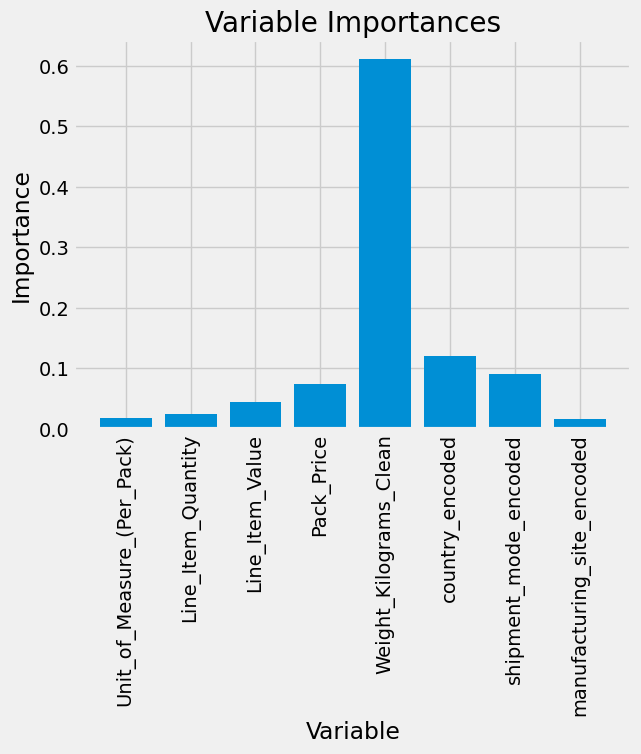

In [ ]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(grid.best_estimator_.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [16]:
results

,Score,Decision Tree,SVR_Regressor,Random Forest,Gradient Boosting,XG_Boost
0,Mean Absolute Error,4533.169375,6599.580086,4030.144973,4392.155537,4051.703911
1,Root Mean Squared Error,8589.573431,12102.288663,7361.482144,7489.048157,6996.815954
2,Mean Squared Error,7378.077172,14646.539088,5419.141936,5608.584230,4895.543349
3,R Square,62.833839,26.219851,72.701735,71.747443,75.339299
